In [188]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from PIL import Image

In [189]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [190]:
transform = torchvision.transforms.Compose(transforms=[
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(size=(500, 500)),
    torchvision.transforms.ToTensor(),
])

In [191]:
def get_rot_mat(theta, device):
    theta_cos = torch.cos(input=theta)
    theta_sin = torch.sin(input=theta)
    zeros = torch.zeros_like(input=theta_cos).to(device)
    return torch.stack(tensors=[theta_cos, -theta_sin, zeros, theta_sin, theta_cos, zeros]).view(2,3)

In [192]:
def rot_img(x, theta, device):
    rot_mat = get_rot_mat(theta=theta, device=device).unsqueeze(dim=0).repeat(x.shape[0],1,1)    # repeat for whole batch
    grid = F.affine_grid(theta=rot_mat, size=x.size(), align_corners=False)
    x = F.grid_sample(input=x, grid=grid, align_corners=False)
    return x

In [193]:
im = torchvision.transforms.Resize(size=(500, 500))(torchvision.io.read_image("notebooks/images/dog_cat.jpg").type(torch.FloatTensor)).to(device)
im.requires_grad = True
im = im.unsqueeze(dim=0)

<Figure size 432x288 with 0 Axes>

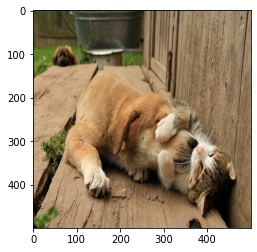

<Figure size 432x288 with 0 Axes>

In [194]:
plt.imshow(im.detach().cpu().squeeze(0).permute(1,2,0)/255)
plt.figure()

Rotate left by pi/2 -> 90 degrees

In [195]:
theta = torch.FloatTensor([np.pi/2]).to(device)
theta.requires_grad=True

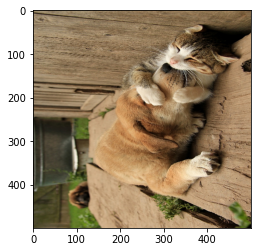

In [196]:
#Rotation by np.pi/2 with autograd support:
rotated_im = rot_img(x=im, theta=theta, device=device) # Rotate image by theta = degree in radians
plt.imshow(rotated_im.detach().cpu().squeeze(0).permute(1,2,0)/255)

In [197]:
loss = torch.mean((im-rotated_im)**2)

In [198]:
loss.backward()

In [199]:
theta.grad

tensor([-21862.0234], device='cuda:0')

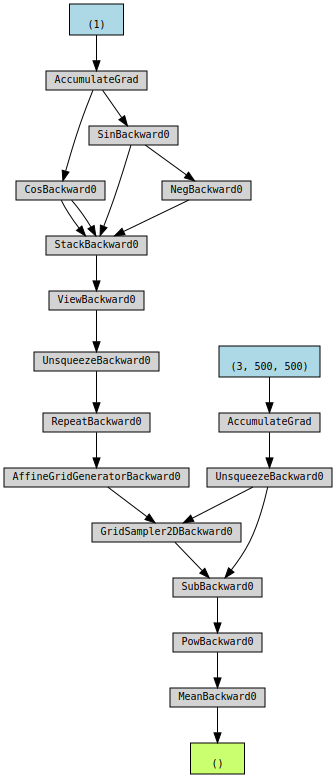

In [200]:
from torchviz import make_dot
make_dot(loss)